# Project Title: Electric Vehicle Population Data Exploration

Project Description: This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
Source Link: https://catalog.data.gov/dataset/electric-vehicle-population-data  Image Link: https://rare-gallery.com/uploads/posts/104775-mercedes-maybach-6-electric-cars-4k.jpg

# Import Modules

In [1]:
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from credentials import *
sys.path.append(sys_path_ds)
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from PIL import Image
from urllib.request import urlopen
from Queries.ev import *
from DataPipelines import datagov_ev_etl
from sqlalchemy import text, create_engine

# Options and Settings

In [2]:
np.set_printoptions(precision=2)
warnings.simplefilter('ignore')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100
pd.options.display.precision = 2
plt.style.use(['ggplot', 'fivethirtyeight'])
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.autolayout'] = True
# print(plt.style.available)

# Load Image

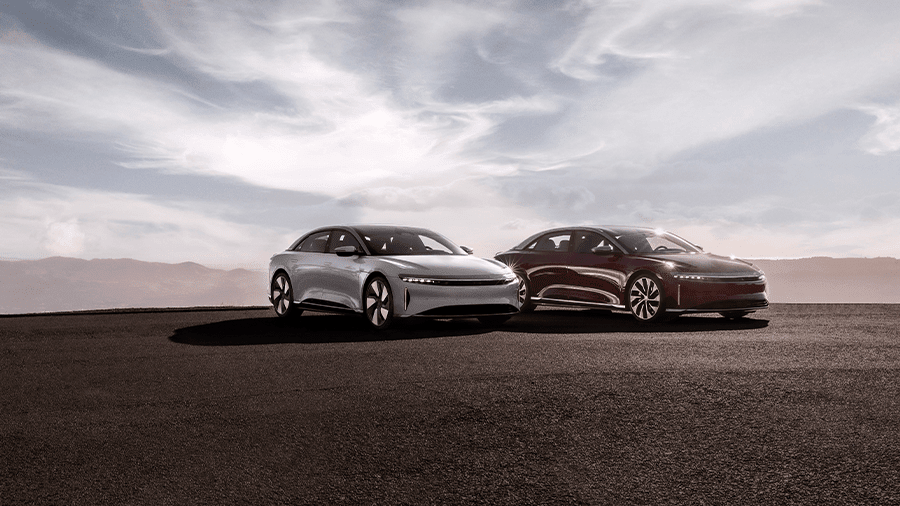

In [3]:
image_url = 'https://res.cloudinary.com/ho5waxsnl/image/upload/q_auto/uye7lkrr50fgbkj9t80p3hy2w3fc.png'
Image.open(urlopen(f'{image_url}'))

# Extract Data

In [4]:
json_data = datagov_ev_etl.extract()

request successful


# Transform Data

In [5]:
datagov_ev_etl.transform()

request successful


,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Electric_Range
0,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238
1,Kitsap,Poulsbo,WA,98370,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),47
2,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220
3,King,Seattle,WA,98119,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75
4,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210
...,...,...,...,...,...,...,...,...,...
130438,Pierce,Gig Harbor,WA,98335,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
130439,Pierce,Tacoma,WA,98408,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),0
130440,King,Seattle,WA,98109,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
130441,Island,Camano Island,WA,98282,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),293


# Load Data

In [6]:
datagov_ev_etl.load()

request successful


,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Electric_Range
0,Yakima,Yakima,WA,98908,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),238
1,Kitsap,Poulsbo,WA,98370,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),47
2,King,Seattle,WA,98199,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220
3,King,Seattle,WA,98119,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75
4,Thurston,Lacey,WA,98516,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210
...,...,...,...,...,...,...,...,...,...
130438,Pierce,Gig Harbor,WA,98335,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
130439,Pierce,Tacoma,WA,98408,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),0
130440,King,Seattle,WA,98109,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0
130441,Island,Camano Island,WA,98282,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),293


# Data Analysis

Create Helper Functions

In [7]:
def fetch_data_pg(query: str)-> pd.DataFrame:
    '''
    query: str
        sql query to execute

    returns:
        pandas dataframe
        
    '''
    engine = create_engine(f'{driver_postgres}://{user_postgres}:{password_postgres}@{hostname_postgres}/{database_postgres}')
    
    df = pd.read_sql(sql=query, con=engine)

    return df


def millions(x, pos):
    '''
    The two args are the value and tick position

    '''
    return '%1.1fM' % (x * 1e-6)


def thousands(x, pos):
    '''
    The two args are the value and tick position

    '''
    return '%1.1fK' % (x * 1e-3)


def plot_bar(df: pd.DataFrame, x: str, y: str, palette: list[str], title: str | None = None, xlabel: str | None = None, ylabel: str | None = None, format=None, **kwargs):
    '''
    Plot bar chart

    df: pd.DataFrame
      pandas dataframe

    x: str
      x-axis

    y: str
      y-axis

    palette: list[str]
      color palette 
      https://seaborn.pydata.org/tutorial/color_palettes.html

    title: str
      plot title

    xlabel: str
      x-axis label
      
    ylabel: str
      y-axis label

    formatter: str or function
      plot axis formatter
      
    '''

    f, ax = plt.subplots()

    sns.barplot(data=df, x=x, y=y, palette=palette, **kwargs)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.yaxis.set_major_formatter(formatter=format)
    plt.xticks(rotation=45)
    sns.despine(left=True)

Returns Vehicle Count By Year 

In [8]:
df_res_1 = fetch_data_pg(query1)
df_res_1

,model_yr,vehicle_count
0,2022,28013
1,2021,18445
2,2023,18217
3,2018,14354
4,2020,11049
5,2019,10507
6,2017,8551
7,2016,5679
8,2015,4931
9,2013,4575


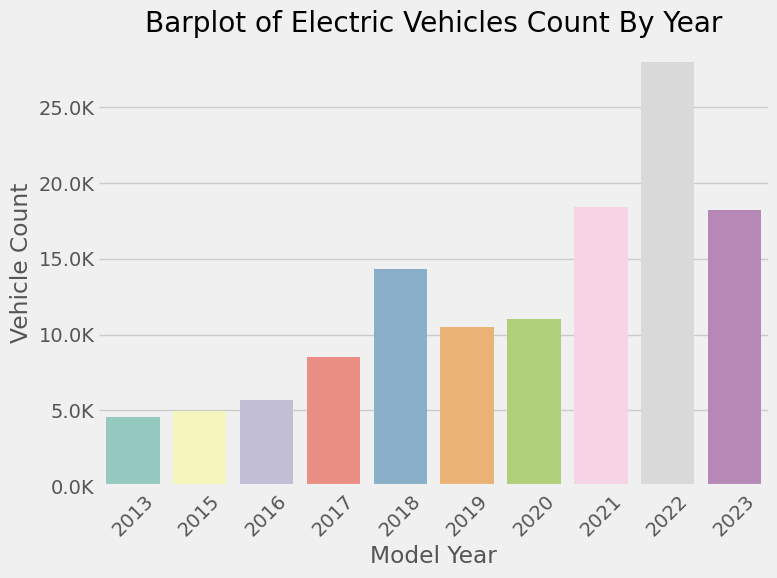

In [9]:
plot_bar(
          df_res_1.sort_values('model_yr', ascending=True),\
          x='model_yr',\
          y='vehicle_count',\
          palette='Set3',\
          title='Barplot of Electric Vehicles Count By Year',\
          xlabel='Model Year',\
          ylabel='Vehicle Count', 
          format=thousands
        )

Returns Vehicle Count By County and City

In [10]:
df_res_2 = fetch_data_pg(query2)
df_res_2

,county,city,vehicle_count
0,King,Seattle,22823
1,King,Bellevue,6733
2,Sarpy,Bellevue,6733
3,King,Redmond,4814
4,Clark,Vancouver,4648
5,King,Kirkland,4066
6,King,Bothell,4020
7,Snohomish,Bothell,4020
8,King,Sammamish,3815
9,King,Renton,3306


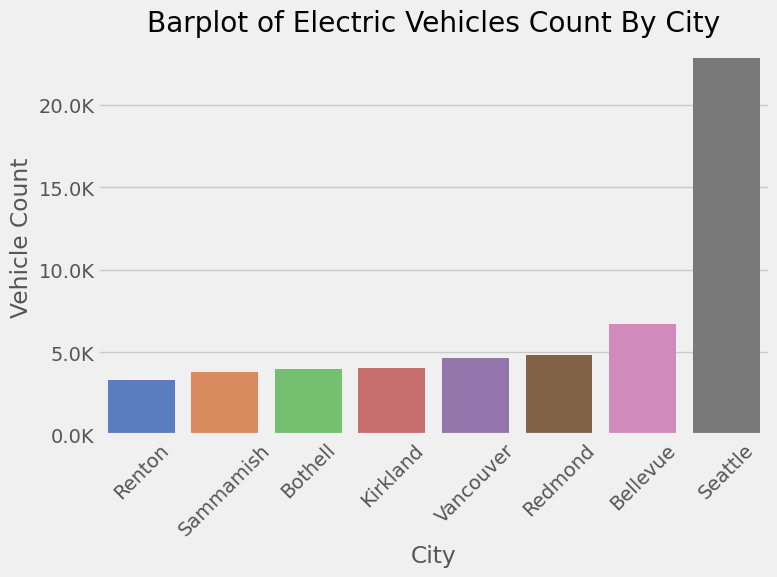

In [11]:
plot_bar(
          df_res_2.sort_values('vehicle_count', ascending=True),\
          x='city',\
          y='vehicle_count',\
          palette='muted',\
          title='Barplot of Electric Vehicles Count By City',\
          xlabel='City',\
          ylabel='Vehicle Count', 
          format=thousands
        )

Returns the total count of electric vehicles by make and model produced each year

In [12]:
df_res_3 = fetch_data_pg(query3)
df_res_3

,model_yr,make,model,cars_count
0,2022,TESLA,MODEL Y,7612
1,2021,TESLA,MODEL Y,6623
2,2018,TESLA,MODEL 3,6226
3,2023,TESLA,MODEL Y,5464
4,2022,TESLA,MODEL 3,5073
...,...,...,...,...
404,2020,KIA,SOUL EV,1
405,2015,PORSCHE,918,1
406,2003,TOYOTA,RAV4,1
407,2023,VOLVO,S90,1


<Axes: title={'center': 'Line Chart of TESLA Model 3 Manufactured Per Year'}, xlabel='Model Year', ylabel='Cars Manufactured'>

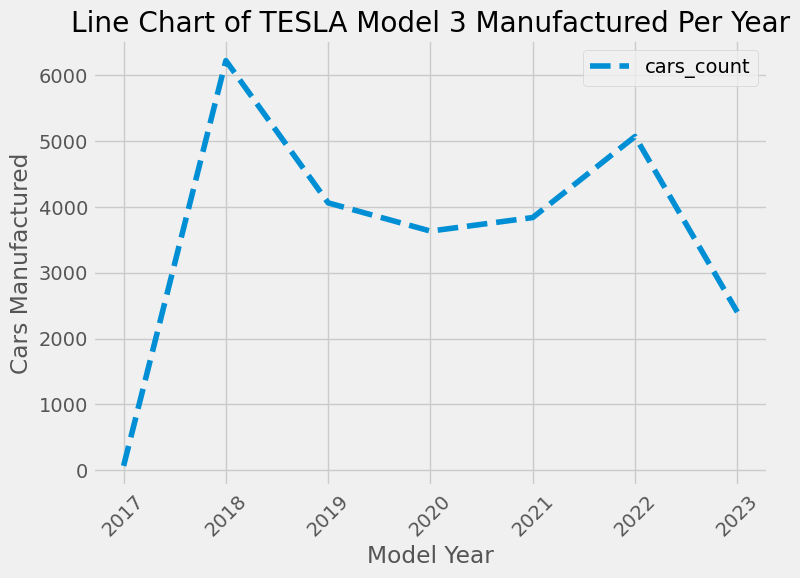

In [13]:
df_res_3\
  .query("make == 'TESLA' & model == 'MODEL 3'")\
    .sort_values('model_yr')\
      .reset_index(drop=True)\
        .plot(x='model_yr', y='cars_count', xlabel='Model Year', ylabel='Cars Manufactured', kind='line', title='Line Chart of TESLA Model 3 Manufactured Per Year', rot=45)